# Project 2 - Ames Housing Data and Kaggle Challenge

## Part 2 - Processing & Feature Engineering

0. Load Data from Part 1
1. Combine Training and Testing Datasets
2. Feature Engineering
3. Create Dummy Variables
4. Save Data for Part 3

In [35]:
# Import numpy and pandas libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [36]:
# Set display Range
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### 2.0 Load Data from Part 1

In [37]:
%store -r df_train
%store -r df_test

### 2.1 Combine Training and Testing Datasets

In [38]:
# Review the shape of training and testing datasets
print(df_train.shape)
print(df_test.shape)

(2001, 82)
(879, 81)


In [39]:
X_tr = df_train.iloc[:, :80]
y_tr = df_train.iloc[:, 80]
y_tr_log = df_train.iloc[:, 81]
X_te = df_test

In [40]:
X_tr.shape

(2001, 80)

In [41]:
X_te.shape

(879, 81)

#### 2.1.1 Label Training and Testing Datasets

In [42]:
# Add Label (last column) to both datasets for future separation after produced the dummy variables
X_tr['zzz'] = 'train'
X_te['zzz'] = 'test'

In [43]:
# Check the 'source' column is added and label is correct
X_tr.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,zzz
0,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,train
1,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,train
2,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,train


In [44]:
# Check the 'source' column is added and label is correct
X_te.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,zzz
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD,test
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,test
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,test


#### 2.1.2 Combine the Datasets
> The purpose of combining the data is to create engineered features and consistent dummy variable for both training and testing data

In [45]:
# Combine
X_temp = pd.concat([X_tr, X_te], sort = False)

In [46]:
# Review the first 5 rows of the combined data
X_temp.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,zzz
0,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,train
1,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,train
2,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,train
3,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,train
4,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,train


#### 2.1.3 Drop the Columns to be Ignored
> See Part 1 for summary

In [47]:
# As previously summarized. The following feature is to be ignored due to missing data
ignore_features = [
                   'mas_vnr_type',
                   'mas_vnr_area',
                   'electrical',
                   'garage_yr_blt',
                   'garage_finish',
                   'garage_qual',
                   'garage_cond'
                  ]

In [48]:
# Check the shape before dropping
X_temp.shape

(2880, 81)

In [49]:
X_temp.drop(columns = ignore_features, inplace = True)

In [50]:
# Check the shape after dropping
X_temp.shape

(2880, 74)

### 2.2 Feature Engineering

#### 2.2.1 Create New Features

In [51]:
# Create age of the house
X_temp['house_age'] = X_temp['yr_sold'] - X_temp['year_built']

In [52]:
# Remove additional NaN values from the engineered feature
X_temp['house_age'] = X_temp['house_age'].fillna(0);
X_temp['lot_frontage'] = X_temp['lot_frontage'].fillna(0);

#### 2.2.2 Data Transformation

In [53]:
# Create log of lot_araa and cubic root of gr_liv_area (new features)
X_temp['lot_area_log'] = np.log(X_temp['lot_area'])
X_temp['gr_liv_area_power'] = (X_temp['gr_liv_area']**(1/3))

### 2.3 Create Dummy Variables

#### 2.3.1 Bar Plots to Decide the Drop Category

**features**|**Type**|**Action**|**Unique**|**drop\_level**
:-----:|:-----:|:-----:|:-----:|:-----:
ms\_subclass|cat|dummy|16| 
ms\_zoning|cat|dummy|7|I (all)
street|cat|dummy|2|Grvl
alley|cat|dummy|3|NA
lot\_shape|cat|dummy|4|Grvl
land\_contour|cat|dummy|4|IR3
utilities|cat|dummy|4|Bnk
lot\_config|cat|dummy|5|NoSewr
land\_slope|cat|dummy|3|FR3
neighborhood|cat|dummy|28|Sev
condition\_1|cat|dummy|9|BrDale
condition\_2|cat|dummy|9|RRNe
bldg\_type|cat|dummy|5|RRNn
house\_style|cat|dummy|8|2fmCon
year\_built|cat|dummy| | 
year\_remod\_add|cat|dummy| | 
roof\_style|cat|dummy|6|1.5Unf
roof\_matl|cat|dummy|8|ClyTile
exterior\_1st|cat|dummy|16|AsphShn
exterior\_2nd|cat|dummy|17|CBlock
exter\_qual|cat|dummy|5|Fa
exter\_cond|cat|dummy|5|Po
foundation|cat|dummy|6|Wood
bsmt\_qual|cat|dummy|6|Po
bsmt\_cond|cat|dummy|6|Fa
bsmt\_exposure|cat|dummy|5|Mn
bsmtfin\_type\_1|cat|dummy|7|LwQ
bsmtfin\_type\_2|cat|dummy|7|LwQ
heating|cat|dummy|6|Grav
heating\_qc|cat|dummy|5|Po
central\_air|cat|dummy|2|No
kitchen\_qual|cat|dummy|5|Po
functional|cat|dummy|8|Sal
fireplace\_qu|cat|dummy|6|NA
garage\_type|cat|dummy|6|NA
paved\_drive|cat|dummy|3|N
pool\_qc|cat|dummy|5|NA
fence|cat|dummy|5|NA
misc\_feature|Cat|dummy|6|NA
mo\_sold|cat|dummy|12|12
yr\_sold|cat|dummy|5|2008
sale\_type|cat|dummy|10|Oth

In [54]:
# Function to plot categorical features vs 'saleprice'
'''input: 
       f_list: list of features to plot
       df: the dataframe
       f: the target feature to plot against
       '''
def plot_scatter(f_list, df, f):
    plt.figure(figsize = (12,42))
    for i in range(len(f_list)):
        plt.subplot(14,3,i+1)
        sns.scatterplot(df[f_list[i]], df[f])
        plt.xticks(rotation = 90)
        plt.title(f_list[i])
    plt.tight_layout()
    plt.show()

In [55]:
# list Features
feature_list = ['ms_subclass',
                'ms_zoning',
                'street',
                'alley',
                'lot_shape',
                'land_contour',
                'utilities',
                'lot_config',
                'land_slope',
                'neighborhood',
                'condition_1',
                'condition_2',
                'bldg_type',
                'house_style',
                'year_built',
                'year_remod_add',
                'roof_style',
                'roof_matl',
                'exterior_1st',
                'exterior_2nd',
                'exter_qual',
                'exter_cond',
                'foundation',
                'bsmt_qual',
                'bsmt_cond',
                'bsmt_exposure',
                'bsmtfin_type_1',
                'bsmtfin_type_2',
                'heating',
                'heating_qc',
                'central_air',
                'kitchen_qual',
                'functional',
                'fireplace_qu',
                'garage_type',
                'paved_drive',
                'pool_qc',
                'fence',
                'misc_feature',
                'mo_sold',
                'yr_sold',
                'sale_type'
               ]

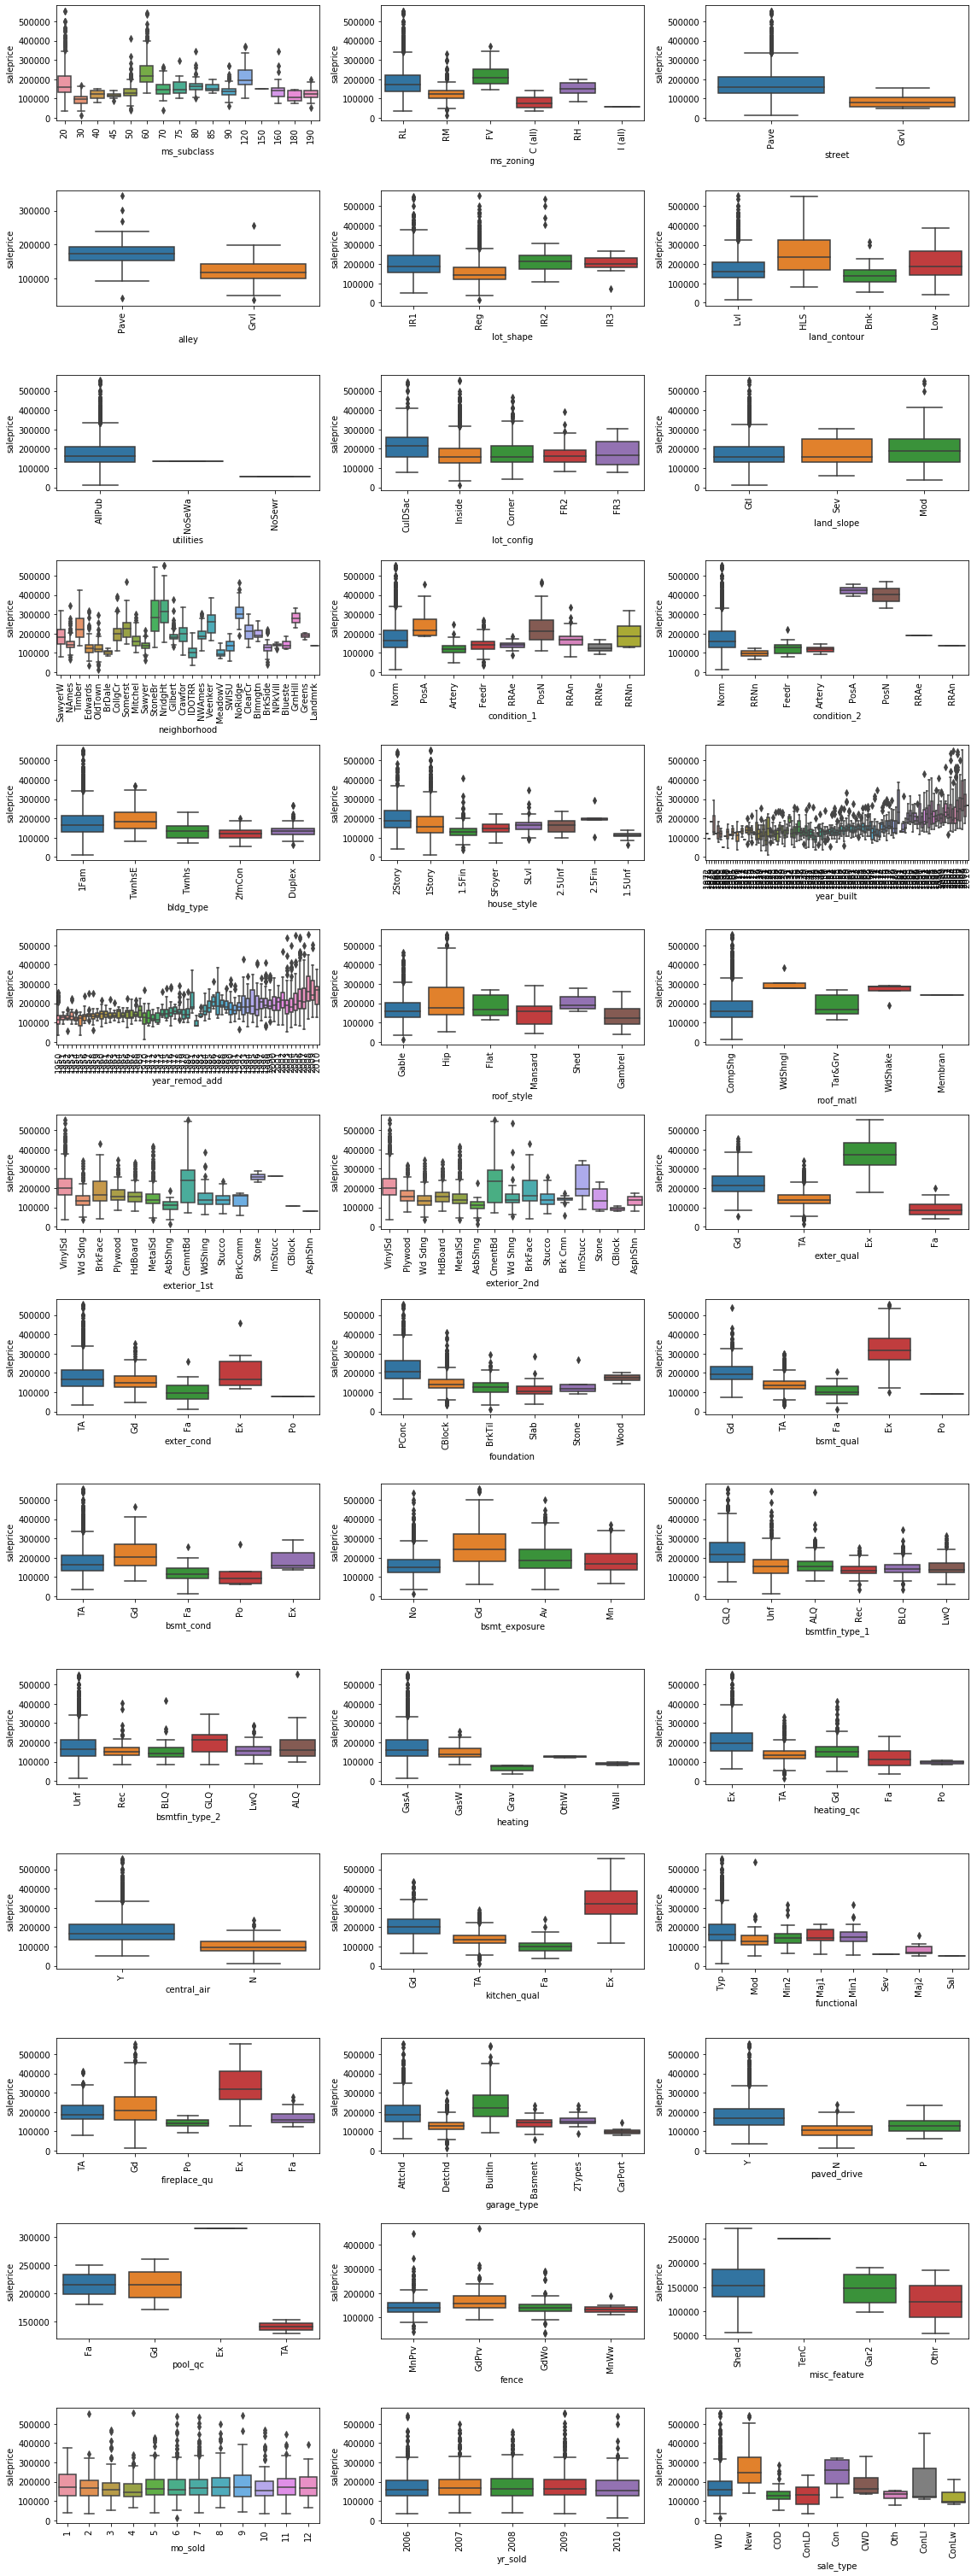

In [56]:
# Box plot for each feature in the feature_list
plt.figure(figsize=(16, 42))
for i in range(len(feature_list)):
    plt.subplot(np.ceil(len(feature_list)/3), 3, i+1)
    sns.boxplot(x=feature_list[i], y='saleprice', data=df_train)
    plt.xticks(rotation = 90)
plt.tight_layout();

#### 2.3.2 Build Dummy Variables

In [57]:
# Function to build a feature list and identify which value to drop for dummy variable
def drop_feature_dict(f_list, df, f):
    return {i: df.groupby(i)[f].mean().sort_values().keys()[0] for i in f_list}

In [58]:
# Create a dictionary for features where 'NA' means No (e.g., No garage, No pool, etc.)
special_case_dict = {'fireplace_qu': 'NA',
                     'garage_type': 'NA',
                     'pool_qc': 'NA',
                     'fence': 'NA',
                     'misc_feature': 'NA'}
drop_dict = drop_feature_dict(feature_list, df_train, feature)

for k,v in special_case_dict.items():
    drop_dict[k] = v

drop_dict

{'ms_subclass': 30,
 'ms_zoning': 'I (all)',
 'street': 'Grvl',
 'alley': 'Grvl',
 'lot_shape': 'Reg',
 'land_contour': 'Bnk',
 'utilities': 'NoSewr',
 'lot_config': 'FR2',
 'land_slope': 'Gtl',
 'neighborhood': 'MeadowV',
 'condition_1': 'Artery',
 'condition_2': 'RRNn',
 'bldg_type': '2fmCon',
 'house_style': '1.5Unf',
 'year_built': 1896,
 'year_remod_add': 1982,
 'roof_style': 'Gambrel',
 'roof_matl': 'CompShg',
 'exterior_1st': 'AsphShn',
 'exterior_2nd': 'CBlock',
 'exter_qual': 'Fa',
 'exter_cond': 'Po',
 'foundation': 'Slab',
 'bsmt_qual': 'Po',
 'bsmt_cond': 'Fa',
 'bsmt_exposure': 'No',
 'bsmtfin_type_1': 'Rec',
 'bsmtfin_type_2': 'BLQ',
 'heating': 'Grav',
 'heating_qc': 'Po',
 'central_air': 'N',
 'kitchen_qual': 'Fa',
 'functional': 'Sal',
 'fireplace_qu': 'NA',
 'garage_type': 'NA',
 'paved_drive': 'N',
 'pool_qc': 'NA',
 'fence': 'NA',
 'misc_feature': 'NA',
 'mo_sold': 4,
 'yr_sold': 2010,
 'sale_type': 'ConLw'}

In [59]:
# Function for creating the dummy variables
'''Add dummy variable to the DataFrame for specified features
   Input:
        df: DataFrame
        feat: features to create dummy variables
        special_feat: features with value 'NA' so do not need to drop a column
   Return: DataFrame
'''
def make_dummy(df, feat, special_feat):
    for k,v in feat.items():
        dummy_df = pd.get_dummies(df[k], prefix=k)
        if k not in special_feat:
            dummy_df.drop(columns=(str(k)+'_'+str(v)), inplace = True)
        df = pd.concat([df, dummy_df], axis = 1)
    return df

In [60]:
# Run function to create the dummy variables
X_temp = make_dummy(X_temp, drop_dict, special_case_dict)

In [61]:
# Check the shape after creating the dummy
X_temp.shape

(2880, 487)

In [62]:
# Drop the original non-numerical features
X_temp.drop(columns = drop_dict.keys(), inplace = True)

In [63]:
# Check the shape after droping the original dummy
X_temp.shape

(2880, 445)

In [64]:
# check top 3 rows of the new database with engineered features and dummy variables
X_temp.head(3)

,id,pid,lot_frontage,lot_area,overall_qual,overall_cond,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,zzz,house_age,lot_area_log,gr_liv_area_power,ms_subclass_20,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_C (all),ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_Pave,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_AllPub,utilities_NoSeWa,lot_config_Corner,lot_config_CulDSac,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,bldg_type_1Fam,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,year_built_1872,year_built_1875,year_built_1879,year_built_1880,year_built_1882,year_built_1885,year_built_1890,year_built_1892,year_built_1895,year_built_1898,year_built_1900,year_built_1901,year_built_1902,year_built_1904,year_built_1905,year_built_1906,year_built_1907,year_built_1908,year_built_1910,year_built_1911,year_built_1912,year_built_1913,year_built_1914,year_built_1915,year_built_1916,year_built_1917,year_built_1918,year_built_1919,year_built_1920,year_built_1921,year_built_1922,year_built_1923,year_built_1924,year_built_1925,year_built_1926,year_built_1927,year_built_1928,year_built_1929,year_built_1930,year_built_1931,year_built_1932,year_built_1934,year_built_1935,year_built_1936,year_built_1937,year_built_1938,year_built_1939,year_built_1940,year_built_1941,year_built_1942,year_built_1945,year_built_1946,year_built_1947,year_built_1948,year_built_1949,year_built_1950,year_built_1951,year_built_1952,year_built_1953,year_built_1954,year_built_1955,year_built_1956,year_built_1957,year_built_1958,year_built_1959,year_built_1960,year_built_1961,year_built_1962,year_built_1963,year_built_1964,year_built_1965,year_built_1966,year_built_1967,year_built_1968,year_built_1969,year_built_1970,year_built_1971,year_built_1972,year_built_1973,year_built_1974,year_built_1975,year_built_1976,year_built_1977,year_built_1978,year_built_1979,year_built_1980,year_built_1981,year_built_1982,year_built_1983,year_built_1984,year_built_1985,year_built_1986,year_built_1987,year_built_1988,year_built_1989,year_built_1990,year_built_1991,year_built_1992,year_built_1993,year_built_1994,year_built_1995,year_built_1996,year_built_1997,year_built_1998,year_built_1999,year_built_2000,year_built_2001,year_built_2002,year_built_2003,year_built_2004,year_built_2005,year_built_2006,year_built_2007,year_built_2008,year_built_2009,year_built_2010,year_remod_add_1950,year_remod_add_1951,year_remod_add_1952,year_remod_add_1953,year_remod_add_1954,year_remod_add_1955,year_remod_add_1956,year_remod_add_1957,year_re

In [65]:
# Add big house feature for house > 3500 SF
X_temp['big_house'] = X_temp['gr_liv_area'].apply(lambda x: 1 if x > 3500 else 0)

In [66]:
# Review the 
X_temp.head(3)

,id,pid,lot_frontage,lot_area,overall_qual,overall_cond,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,zzz,house_age,lot_area_log,gr_liv_area_power,ms_subclass_20,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_C (all),ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_Pave,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_AllPub,utilities_NoSeWa,lot_config_Corner,lot_config_CulDSac,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,bldg_type_1Fam,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,year_built_1872,year_built_1875,year_built_1879,year_built_1880,year_built_1882,year_built_1885,year_built_1890,year_built_1892,year_built_1895,year_built_1898,year_built_1900,year_built_1901,year_built_1902,year_built_1904,year_built_1905,year_built_1906,year_built_1907,year_built_1908,year_built_1910,year_built_1911,year_built_1912,year_built_1913,year_built_1914,year_built_1915,year_built_1916,year_built_1917,year_built_1918,year_built_1919,year_built_1920,year_built_1921,year_built_1922,year_built_1923,year_built_1924,year_built_1925,year_built_1926,year_built_1927,year_built_1928,year_built_1929,year_built_1930,year_built_1931,year_built_1932,year_built_1934,year_built_1935,year_built_1936,year_built_1937,year_built_1938,year_built_1939,year_built_1940,year_built_1941,year_built_1942,year_built_1945,year_built_1946,year_built_1947,year_built_1948,year_built_1949,year_built_1950,year_built_1951,year_built_1952,year_built_1953,year_built_1954,year_built_1955,year_built_1956,year_built_1957,year_built_1958,year_built_1959,year_built_1960,year_built_1961,year_built_1962,year_built_1963,year_built_1964,year_built_1965,year_built_1966,year_built_1967,year_built_1968,year_built_1969,year_built_1970,year_built_1971,year_built_1972,year_built_1973,year_built_1974,year_built_1975,year_built_1976,year_built_1977,year_built_1978,year_built_1979,year_built_1980,year_built_1981,year_built_1982,year_built_1983,year_built_1984,year_built_1985,year_built_1986,year_built_1987,year_built_1988,year_built_1989,year_built_1990,year_built_1991,year_built_1992,year_built_1993,year_built_1994,year_built_1995,year_built_1996,year_built_1997,year_built_1998,year_built_1999,year_built_2000,year_built_2001,year_built_2002,year_built_2003,year_built_2004,year_built_2005,year_built_2006,year_built_2007,year_built_2008,year_built_2009,year_built_2010,year_remod_add_1950,year_remod_add_1951,year_remod_add_1952,year_remod_add_1953,year_remod_add_1954,year_remod_add_1955,year_remod_add_1956,year_remod_add_1957,year_re

In [67]:
# Function for re-format DataFrame Columns
'''This function converts:
   1. letters to all lower case, and
   2. space and special characters to underscore
   input:   DataFrame
   returns: DataFrame (same name)
   '''
def format_columns(df):
    df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('/','_').str.replace('(','').str.replace(')','')   
    return df

In [68]:
# reformat columns
X_temp = format_columns(X_temp)

In [69]:
X_temp.head(3)

,id,pid,lot_frontage,lot_area,overall_qual,overall_cond,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,zzz,house_age,lot_area_log,gr_liv_area_power,ms_subclass_20,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_c_all,ms_zoning_fv,ms_zoning_rh,ms_zoning_rl,ms_zoning_rm,street_pave,alley_pave,lot_shape_ir1,lot_shape_ir2,lot_shape_ir3,land_contour_hls,land_contour_low,land_contour_lvl,utilities_allpub,utilities_nosewa,lot_config_corner,lot_config_culdsac,lot_config_fr3,lot_config_inside,land_slope_mod,land_slope_sev,neighborhood_blmngtn,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_mitchel,neighborhood_names,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker,condition_1_feedr,condition_1_norm,condition_1_posa,condition_1_posn,condition_1_rrae,condition_1_rran,condition_1_rrne,condition_1_rrnn,condition_2_artery,condition_2_feedr,condition_2_norm,condition_2_posa,condition_2_posn,condition_2_rrae,condition_2_rran,bldg_type_1fam,bldg_type_duplex,bldg_type_twnhs,bldg_type_twnhse,house_style_1.5fin,house_style_1story,house_style_2.5fin,house_style_2.5unf,house_style_2story,house_style_sfoyer,house_style_slvl,year_built_1872,year_built_1875,year_built_1879,year_built_1880,year_built_1882,year_built_1885,year_built_1890,year_built_1892,year_built_1895,year_built_1898,year_built_1900,year_built_1901,year_built_1902,year_built_1904,year_built_1905,year_built_1906,year_built_1907,year_built_1908,year_built_1910,year_built_1911,year_built_1912,year_built_1913,year_built_1914,year_built_1915,year_built_1916,year_built_1917,year_built_1918,year_built_1919,year_built_1920,year_built_1921,year_built_1922,year_built_1923,year_built_1924,year_built_1925,year_built_1926,year_built_1927,year_built_1928,year_built_1929,year_built_1930,year_built_1931,year_built_1932,year_built_1934,year_built_1935,year_built_1936,year_built_1937,year_built_1938,year_built_1939,year_built_1940,year_built_1941,year_built_1942,year_built_1945,year_built_1946,year_built_1947,year_built_1948,year_built_1949,year_built_1950,year_built_1951,year_built_1952,year_built_1953,year_built_1954,year_built_1955,year_built_1956,year_built_1957,year_built_1958,year_built_1959,year_built_1960,year_built_1961,year_built_1962,year_built_1963,year_built_1964,year_built_1965,year_built_1966,year_built_1967,year_built_1968,year_built_1969,year_built_1970,year_built_1971,year_built_1972,year_built_1973,year_built_1974,year_built_1975,year_built_1976,year_built_1977,year_built_1978,year_built_1979,year_built_1980,year_built_1981,year_built_1982,year_built_1983,year_built_1984,year_built_1985,year_built_1986,year_built_1987,year_built_1988,year_built_1989,year_built_1990,year_built_1991,year_built_1992,year_built_1993,year_built_1994,year_built_1995,year_built_1996,year_built_1997,year_built_1998,year_built_1999,year_built_2000,year_built_2001,year_built_2002,year_built_2003,year_built_2004,year_built_2005,year_built_2006,year_built_2007,year_built_2008,year_built_2009,year_built_2010,year_remod_add_1950,year_remod_add_1951,year_remod_add_1952,year_remod_add_1953,year_remod_add_1954,year_remod_add_1955,year_remod_add_1956,year_remod_add_1957,year_remo

#### 2.3.3 Seperate the Training and Testing Data

In [70]:
X_temp['zzz'].unique()

array(['train', 'test'], dtype=object)

In [71]:
# Separate X_train and X_test by 'zzz' column, then delete the column.
X_tr = X_temp[X_temp['zzz'] == 'train']
X_tr.drop(columns = 'zzz', inplace = True)

X_te = X_temp[X_temp['zzz'] == 'test']
X_te.drop(columns = 'zzz', inplace = True)

/Users/kaizhao/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [72]:
X_tr.head(3)

,id,pid,lot_frontage,lot_area,overall_qual,overall_cond,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,house_age,lot_area_log,gr_liv_area_power,ms_subclass_20,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_c_all,ms_zoning_fv,ms_zoning_rh,ms_zoning_rl,ms_zoning_rm,street_pave,alley_pave,lot_shape_ir1,lot_shape_ir2,lot_shape_ir3,land_contour_hls,land_contour_low,land_contour_lvl,utilities_allpub,utilities_nosewa,lot_config_corner,lot_config_culdsac,lot_config_fr3,lot_config_inside,land_slope_mod,land_slope_sev,neighborhood_blmngtn,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_mitchel,neighborhood_names,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker,condition_1_feedr,condition_1_norm,condition_1_posa,condition_1_posn,condition_1_rrae,condition_1_rran,condition_1_rrne,condition_1_rrnn,condition_2_artery,condition_2_feedr,condition_2_norm,condition_2_posa,condition_2_posn,condition_2_rrae,condition_2_rran,bldg_type_1fam,bldg_type_duplex,bldg_type_twnhs,bldg_type_twnhse,house_style_1.5fin,house_style_1story,house_style_2.5fin,house_style_2.5unf,house_style_2story,house_style_sfoyer,house_style_slvl,year_built_1872,year_built_1875,year_built_1879,year_built_1880,year_built_1882,year_built_1885,year_built_1890,year_built_1892,year_built_1895,year_built_1898,year_built_1900,year_built_1901,year_built_1902,year_built_1904,year_built_1905,year_built_1906,year_built_1907,year_built_1908,year_built_1910,year_built_1911,year_built_1912,year_built_1913,year_built_1914,year_built_1915,year_built_1916,year_built_1917,year_built_1918,year_built_1919,year_built_1920,year_built_1921,year_built_1922,year_built_1923,year_built_1924,year_built_1925,year_built_1926,year_built_1927,year_built_1928,year_built_1929,year_built_1930,year_built_1931,year_built_1932,year_built_1934,year_built_1935,year_built_1936,year_built_1937,year_built_1938,year_built_1939,year_built_1940,year_built_1941,year_built_1942,year_built_1945,year_built_1946,year_built_1947,year_built_1948,year_built_1949,year_built_1950,year_built_1951,year_built_1952,year_built_1953,year_built_1954,year_built_1955,year_built_1956,year_built_1957,year_built_1958,year_built_1959,year_built_1960,year_built_1961,year_built_1962,year_built_1963,year_built_1964,year_built_1965,year_built_1966,year_built_1967,year_built_1968,year_built_1969,year_built_1970,year_built_1971,year_built_1972,year_built_1973,year_built_1974,year_built_1975,year_built_1976,year_built_1977,year_built_1978,year_built_1979,year_built_1980,year_built_1981,year_built_1982,year_built_1983,year_built_1984,year_built_1985,year_built_1986,year_built_1987,year_built_1988,year_built_1989,year_built_1990,year_built_1991,year_built_1992,year_built_1993,year_built_1994,year_built_1995,year_built_1996,year_built_1997,year_built_1998,year_built_1999,year_built_2000,year_built_2001,year_built_2002,year_built_2003,year_built_2004,year_built_2005,year_built_2006,year_built_2007,year_built_2008,year_built_2009,year_built_2010,year_remod_add_1950,year_remod_add_1951,year_remod_add_1952,year_remod_add_1953,year_remod_add_1954,year_remod_add_1955,year_remod_add_1956,year_remod_add_1957,year_remod_ad

In [73]:
X_te.head(3)

,id,pid,lot_frontage,lot_area,overall_qual,overall_cond,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,house_age,lot_area_log,gr_liv_area_power,ms_subclass_20,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_c_all,ms_zoning_fv,ms_zoning_rh,ms_zoning_rl,ms_zoning_rm,street_pave,alley_pave,lot_shape_ir1,lot_shape_ir2,lot_shape_ir3,land_contour_hls,land_contour_low,land_contour_lvl,utilities_allpub,utilities_nosewa,lot_config_corner,lot_config_culdsac,lot_config_fr3,lot_config_inside,land_slope_mod,land_slope_sev,neighborhood_blmngtn,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_mitchel,neighborhood_names,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker,condition_1_feedr,condition_1_norm,condition_1_posa,condition_1_posn,condition_1_rrae,condition_1_rran,condition_1_rrne,condition_1_rrnn,condition_2_artery,condition_2_feedr,condition_2_norm,condition_2_posa,condition_2_posn,condition_2_rrae,condition_2_rran,bldg_type_1fam,bldg_type_duplex,bldg_type_twnhs,bldg_type_twnhse,house_style_1.5fin,house_style_1story,house_style_2.5fin,house_style_2.5unf,house_style_2story,house_style_sfoyer,house_style_slvl,year_built_1872,year_built_1875,year_built_1879,year_built_1880,year_built_1882,year_built_1885,year_built_1890,year_built_1892,year_built_1895,year_built_1898,year_built_1900,year_built_1901,year_built_1902,year_built_1904,year_built_1905,year_built_1906,year_built_1907,year_built_1908,year_built_1910,year_built_1911,year_built_1912,year_built_1913,year_built_1914,year_built_1915,year_built_1916,year_built_1917,year_built_1918,year_built_1919,year_built_1920,year_built_1921,year_built_1922,year_built_1923,year_built_1924,year_built_1925,year_built_1926,year_built_1927,year_built_1928,year_built_1929,year_built_1930,year_built_1931,year_built_1932,year_built_1934,year_built_1935,year_built_1936,year_built_1937,year_built_1938,year_built_1939,year_built_1940,year_built_1941,year_built_1942,year_built_1945,year_built_1946,year_built_1947,year_built_1948,year_built_1949,year_built_1950,year_built_1951,year_built_1952,year_built_1953,year_built_1954,year_built_1955,year_built_1956,year_built_1957,year_built_1958,year_built_1959,year_built_1960,year_built_1961,year_built_1962,year_built_1963,year_built_1964,year_built_1965,year_built_1966,year_built_1967,year_built_1968,year_built_1969,year_built_1970,year_built_1971,year_built_1972,year_built_1973,year_built_1974,year_built_1975,year_built_1976,year_built_1977,year_built_1978,year_built_1979,year_built_1980,year_built_1981,year_built_1982,year_built_1983,year_built_1984,year_built_1985,year_built_1986,year_built_1987,year_built_1988,year_built_1989,year_built_1990,year_built_1991,year_built_1992,year_built_1993,year_built_1994,year_built_1995,year_built_1996,year_built_1997,year_built_1998,year_built_1999,year_built_2000,year_built_2001,year_built_2002,year_built_2003,year_built_2004,year_built_2005,year_built_2006,year_built_2007,year_built_2008,year_built_2009,year_built_2010,year_remod_add_1950,year_remod_add_1951,year_remod_add_1952,year_remod_add_1953,year_remod_add_1954,year_remod_add_1955,year_remod_add_1956,year_remod_add_1957,year_remod_ad

### 2.4 Save Data for Part 3

In [74]:
%store X_tr
%store X_te
%store y_tr
%store y_tr_log

Stored 'X_tr' (DataFrame)
Stored 'X_te' (DataFrame)
Stored 'y_tr' (Series)
Stored 'y_tr_log' (Series)
